# Solução de equações de uma variável
Nesse Notebook iremos apresentar métodos para a solução de equações de uma variável, ou seja, equações do tipo $ p(x) = x^5 + 3x^3 - x^2 + 5x - 20 $

In [54]:
// Algumas configurações
funcprot(0); // Permitir redefinição de funções

## Determinação das raízes de funções
Para poder encontrar soluções para equações de uma variável, precisamos primeiro determinar a existência de raízes reais.

### Teorema de Bolzano
Se $ f: [a, b] \rightarrow \mathbb{R}, y = f(x) $ é uma função contínua tal que $ f(a) \cdot f(b) < 0 $, então existe $ x^* \in (a, b) $ tal que $ f(x^*) = 0 $.

O que isso significa é que, se a função $f$ possui valores com sinais opostos nos extremos do intervalo, então $f$ cruza o eixo-x e então possui um zero nesse intervalo.

Ademais
1. Se $f(a)f(b) < 0$, então existe um número ímpar de raízes reais em $[a, b]$
2. Se $f(a)f(b) > 0$, então existe um número par de raízes reais em $[a, b]$
3. Supondo que $f$ e sua derivada $f'$ sejam contínuas em $[a, b]$ e que o sinal de $f'$ seja constante nesse intervalo (monotônica, só cresce ou só diminui) tem-se:
    a. Se $f(a)f(b) < 0$, então existe uma única raíz real em $[a, b]$
    b. Se $f(a)f(b) > 0$, então não existe raíz real em $[a, b]$

### Regra de Descartes
Seja $T$ o número de trocas de coeficientes. Então $P(x) = 0$ tem $T$ ou $(T-2)$ ou $(T-4)$ ... raízes reais positivas

### Regra da Lacuna
Se os coeficientes de $p(x)$ são todos reais e para algum $k : 1 \leq k < n$ existir:
1. $a_k = 0$ e $a_{k-1}\cdot a_{k+1} > 0$, então $p(x) = 0$ tem raízes complexas
2. dois ou mais coeficientes nulos sucessivos, então $p(x) = 0$ tem raízes complexas

## Cotas
Cotas são as medidas que determinam a região onde as raízes das funções se encontram ao longo do eixo

### Cotas de Fujiwara e Kojima
Seja $\alpha$ uma raiz de $p(x)=0$

$$k = \left\{ \left| \cfrac{a_{n-1}}{a_n} \right|^1, \left| \cfrac{a_{n-2}}{a_n} \right|^{1/2}, \left| \cfrac{a_{n-3}}{a_n} \right|^{1/3}, \cdots, \left| \cfrac{a_1}{a_n} \right|^{1/{n-1}}, \left| \cfrac{a_0}{a_n} \right|^{1/n} \right\}$$

#### Cota de Fujiwara
$|\alpha| \leq 2\cdot max(k)$

#### Cota de Kojima
$|\alpha| \leq (q_1 + q_2)$, 
onde $q_1$ e $q_2 \in max(k)$

### Cota de Cauchy
As raízes reais ou complexas de $p(x)$ satisfazem $|\alpha| \leq \gamma$ sendo $\gamma$ dado por

    TODO
<!--
$$  \gamma = \lim_{i\to\infty}x_i $$
$$x_0 = 0$$
$$ x_{i+1} = \left\{ \left| \frac{a_1}{a_0}x^{n-1} \right| + \right\} $$
-->



## Método da Bisseção
Definiremos nessa seção uma função do SciLab que, dada uma função, um intervalo, uma tolerância, e um número máximo de iterações, utiliza o método da bisseção para encontrar a raíz.

Esse método utiliza diretamente o [Teorema de Bolzano](#Teorema-de-Bolzano) para aproximar o zero de uma função. A cada etapa, o intervalo $[a, b]$ é reduzido à metade. Observe:

$ x_i = \frac{a_i + b_i}{2} $ 

- Se $f(a_i)f(x_i) < 0$, então $x^* \in (a_i, x_i)$ e $b_{i+1} = x_i$
- Se $f(x_i)f(b_i) < 0$, então $x^* \in (x_i, b_i)$ e $a_{i+1} = x_i$
- $f(x_i) = 0$, $x^* = x_i$

O critério de parada é:
- $f(x_i) = 0$
- $ \cfrac{|b_i - a_i|}{2} < TOL $
Onde $TOL$ é tolerância do erro

O Método da Bisseção, se fornecido uma função $f$ contínua em $[a, b]$, tal que $f(a)f(b) < 0$ e $x^*$ é o único zero de $f(x)$ em $(a, b)$, sempre converge.







 x  = 

   0.6416016

 ans  =

  -0.0001379



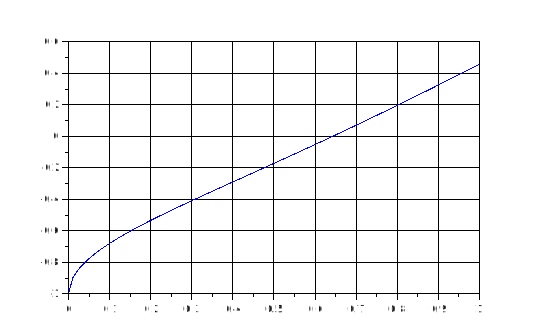

In [55]:
function [x] = bissecao(f, intervalo, TOL, N)
    a = intervalo(1);
    b = intervalo(2);
    for i = 1:N
        x = (a + b)/2;
        e = abs(b - a)/2;
        fx = f(x);
        if (fx == 0 || e < TOL)
            x = return(x);
        elseif (f(a)*fx < 0)
            b = x;
        elseif (fx*f(b) < 0)
            a = x;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = sqrt(x) - cos(x)');
intervalo = [0, 1];
x = linspace(intervalo(1), intervalo(2), 100);
plot(x, f(x));xgrid
x = bissecao(f, intervalo, 0.001, 10)
f(x)

## Método da Posição Falsa
Semelhante ao método da bisseção, porém mais elaborado.

1. Escolhe-se $x_0$ e $x_1$, tal que $f(x_0)f(x_1) < 0$
2. Aproxima-se

$\qquad x_2 = \cfrac{x_1f(x_0) - x_0f(x_1)}{f(x_0) - f(x_1)}$

3. Se o critério de parada for satisfeito, então $x_2$ é a resposta. Senão segue.
4. Se $f(x_0)f(x_2) < 0$, então $x_1 = x_2$. Se $f(x_2)f(x_1) < 0$, então $x_0 = x_2$. Volte para o passo 2.







 x  = 

  -0.9321149

 ans  =

   0.



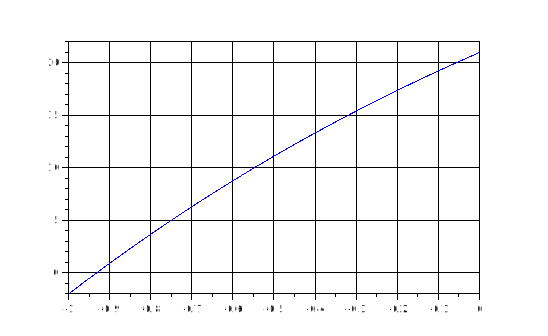

In [76]:
function [x] = regulafalsi(f, x0, x1, TOL, N)
    for i = 1:N
        fx0 = f(x0);
        fx1 = f(x1);
        x2 = (x1*fx0 - x0*fx1)/(fx0 - fx1);
        fx2 = f(x2);
        e = abs(fx1 - fx0)/2;
        if (fx2 == 0 || e < TOL)
            x = return(x2);
        elseif (fx0*fx2 < 0)
            x1 = x2;
        elseif (fx2*fx1 < 0)
            x0 = x2;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = x^3 - 5*x^2 + 17*x + 21');
x0 = -1; x1 = 0;
x = linspace(x0, x1, 100);
plot(x, f(x));xgrid
x = regulafalsi(f, x0, x1, 0.001, 10)
f(x)

## Método da Iteração de Ponto Fixo
O método do ponto fixo consiste em transformar o problema de encontrar $f(x) = 0$ para encontrar $g(x) = x$.

Exemplo:
$f(x) = e^x - x - 2 \Leftrightarrow x = e^x - 2$

Outra maneira de construir $g$ é a seguinte:

$ f(x) = 0 \Rightarrow \alpha f(x) = 0 \Rightarrow x - \alpha f(x) = x $, $g(x) = x - \alpha f(x)$, para algum parâmetro $\alpha \neq 0$

Encontar $g(x) = x$, consiste em iterar sobre:

$ x^{(n+1)} = g(x^{(n)}), n \geq 1 $










 x  = 

   1.7455047

 ans  =

  -0.0003660



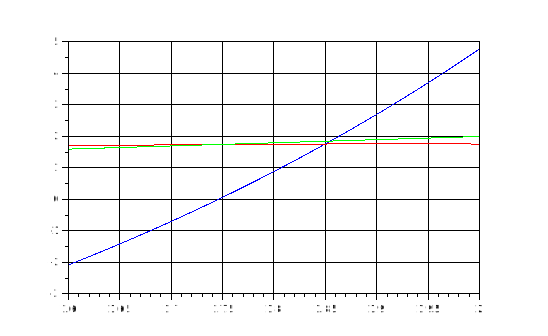

In [86]:
function [x] = pontofixo(g, x0, delta, N)
    for i = 1:N
        x1 = g(x0);
        e = abs(x1 - x0);
        if (x0 == x1 || e < delta)
            x = return(x1);
        else
            x0 = x1;
        end
    end
    error('Número máximo de iterações excedido!')
endfunction

deff('y = f(x)', 'y = x.*exp(x) - 10');
deff('y = g(x)', 'y = x - 0.05*f(x)');
x0 = 1.7;
x = linspace(1.6, 2, 1000);
plot(x, f(x));xgrid
plot(x, g(x), 'r');xgrid
plot(x, x, 'g');xgrid // Identidade
x = pontofixo(g, x0, 0.0001, 10)
f(x)

## Método de Newton-Raphson

## Método das secantes